# train new model with selected features and revert log transformation

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("cs1_part3_res.csv")

In [3]:
#include saleprice here
df = df[['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch','saleprice']]

In [4]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

In [5]:
##Log transformation of sale price for whole training set
x = np.expm1(y)
df['saleprice'] = x

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
lasso_model = LassoCV()

In [9]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [10]:
pred_test_lasso = lasso_model.predict(X_test)

In [11]:
pred_test_lasso[pred_test_lasso<0] = 0

In [12]:
pred_test_lasso

array([139325.76063761,  19456.34769416, 149018.24636858, 102859.5686662 ,
       237631.00390444, 230126.99556925, 161487.35812678, 278501.68118587,
       135368.45499961, 147622.8536315 ,  83187.47746837, 119497.74868311,
       146831.81127861, 167003.52302739, 166788.79084859,  77913.64234936,
       146910.7475542 , 185186.36012821, 110254.20609473, 192133.12270824,
       239759.19320607, 129897.27794239, 219684.24858464, 164165.93079336,
       206459.60061861, 280717.66407588, 190735.21801883, 107756.13779369,
       186115.66238147, 347909.12017802, 233296.82788366, 296072.8847936 ,
       272713.1656536 , 120181.03326858, 133579.86651637, 268787.05508623,
       137392.62752066, 214114.15101764, 108194.87609812, 223240.96190689,
       142888.05441541, 147574.90872202, 111922.00319645, 128987.46105475,
       205323.77826578, 120895.58200605, 165792.79236775, 238260.68687414,
       183602.36560654,  98611.40222471, 189024.81458216, 238185.85246557,
       105581.59293036, 1

In [13]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [14]:
MAE_Lasso

23148.827512118358

In [15]:
MSE_Lasso

1108015507.6536603

In [16]:
RMSE_Lasso

33286.866894522536

In [17]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [18]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [19]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  13.019556999459464


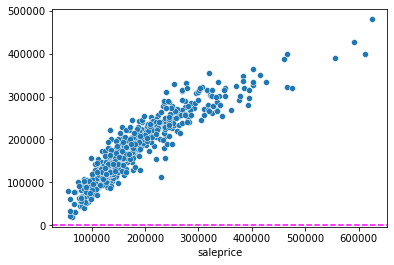

In [20]:
sns.scatterplot(x=y_test,y=pred_test_lasso)
plt.axhline(y=0,color='magenta',linestyle='--')

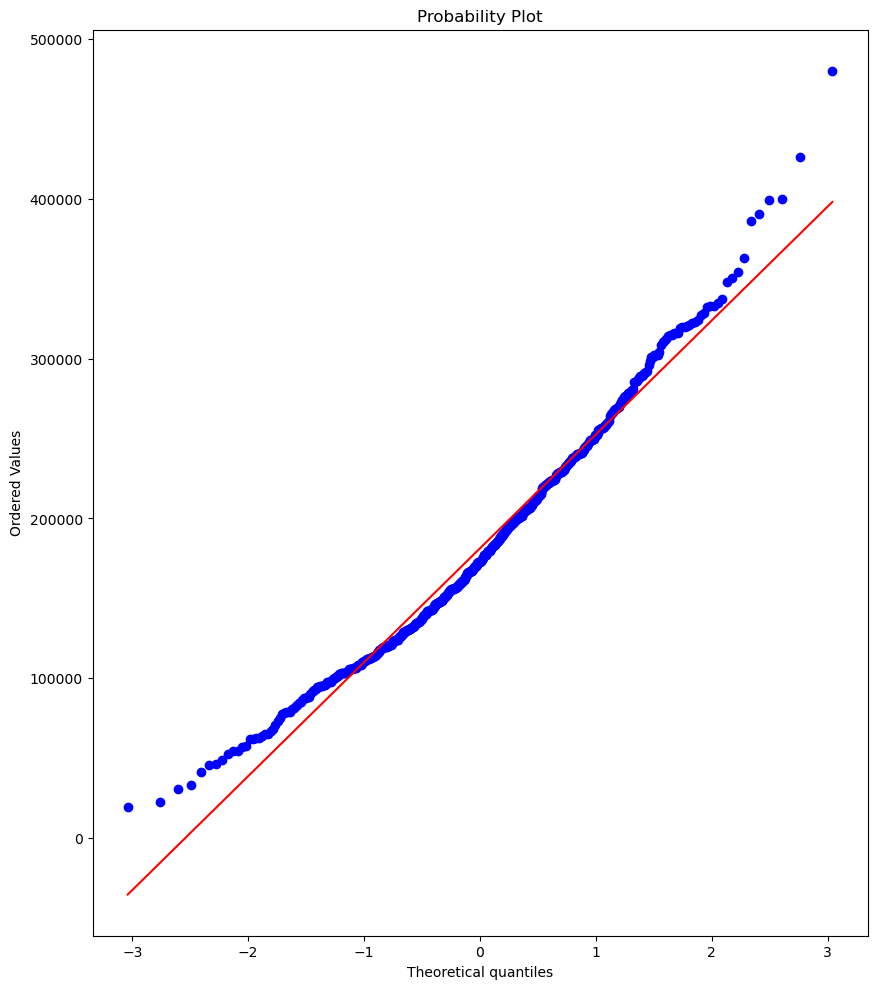

In [21]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_lasso,plot=ax)

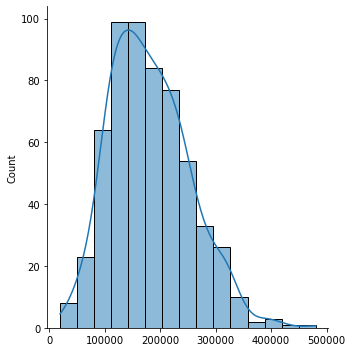

In [22]:
sns.displot(pred_test_lasso,bins=15,kde=True)

In [23]:
dump(scaler,"cs1_Ames_Housing_scaler.pkl")

['cs1_Ames_Housing_scaler.pkl']

In [24]:
dump(lasso_model,"cs1_Ames_Housing_model.h5")

['cs1_Ames_Housing_model.h5']